## Consumption expenditure 소비지출 패턴

In [1]:
import pandas as pd
df_ce = pd.read_csv('C:/coding/multicampus/5조_세미프로젝트/KDTteam5_semiproject/datas_background/한국은행 경제통계 시스템\가계의 목적별 최종소비지출(계절조정, 명목, 분기)_02124923.csv'
                     , header=0, skipfooter=4, thousands=',', encoding='utf8')
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   통계표      12 non-null     object 
 1   계정항목     12 non-null     object 
 2   단위       12 non-null     object 
 3   변환       12 non-null     object 
 4   2016/Q2  12 non-null     float64
 5   2016/Q3  12 non-null     float64
 6   2016/Q4  12 non-null     float64
 7   2017/Q1  12 non-null     float64
 8   2017/Q2  12 non-null     float64
 9   2017/Q3  12 non-null     float64
 10  2017/Q4  12 non-null     float64
 11  2018/Q1  12 non-null     float64
 12  2018/Q2  12 non-null     float64
 13  2018/Q3  12 non-null     float64
 14  2018/Q4  12 non-null     float64
 15  2019/Q1  12 non-null     float64
 16  2019/Q2  12 non-null     float64
 17  2019/Q3  12 non-null     float64
 18  2019/Q4  12 non-null     float64
 19  2020/Q1  12 non-null     float64
 20  2020/Q2  12 non-null     float64
 21  2020/Q3  12 non-nu

C:\Users\user\AppData\Local\Temp\ipykernel_8980\1123314958.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_ce = pd.read_csv('C:/coding/multicampus/5조_세미프로젝트/KDTteam5_semiproject/datas_background/한국은행 경제통계 시스템\가계의 목적별 최종소비지출(계절조정, 명목, 분기)_02124923.csv'


In [2]:
#불필요한 컬럼 삭제
df_ce = df_ce.drop(['통계표'], axis=1) 
df_ce = df_ce.drop([0])
df_ce.head(3)

,계정항목,단위,변환,2016/Q2,2016/Q3,2016/Q4,2017/Q1,2017/Q2,2017/Q3,2017/Q4,...,2020/Q1,2020/Q2,2020/Q3,2020/Q4,2021/Q1,2021/Q2,2021/Q3,2021/Q4,2022/Q1,2022/Q2
1,식료품 및 비주류음료품,십억원,원자료,22529.1,22907.1,23408.3,23373.5,23507.3,23750.3,24150.7,...,26877.1,27011.3,28064.9,28420.7,28721.3,29056.4,29608.4,30196.3,29733.0,30179.2
2,주류 및 담배,십억원,원자료,4084.0,4100.4,4142.2,4077.3,4125.3,4095.3,4228.5,...,4152.1,4166.7,4256.9,4060.6,4183.6,4302.8,4248.1,4197.9,4353.0,4376.9
3,의류 및 신발,십억원,원자료,13034.2,12856.8,12874.1,12891.0,12869.2,12898.4,13170.7,...,10494.5,11541.2,10933.0,11319.0,11348.8,12619.9,12670.9,13417.4,12577.9,13911.0


In [3]:
#인덱스 설정
df_ce = df_ce.set_index(keys='계정항목')

In [4]:
#정확한 비교를 위해 년도 선정
data_col = ['2019/Q4', '2020/Q1', '2020/Q4', '2021/Q1', '2021/Q4','2022/Q1']
ce_choice = df_ce[data_col]
ce_choice

,2019/Q4,2020/Q1,2020/Q4,2021/Q1,2021/Q4,2022/Q1
계정항목,,,,,,
식료품 및 비주류음료품,25812.9,26877.1,28420.7,28721.3,30196.3,29733.0
주류 및 담배,4081.1,4152.1,4060.6,4183.6,4197.9,4353.0
의류 및 신발,12933.6,10494.5,11319.0,11348.8,13417.4,12577.9
임대료 및 수도광열,39059.3,39130.8,39937.6,40187.1,41455.6,42265.2
가계시설 및 운영,6675.6,6907.0,7872.2,7876.6,8391.2,8009.2
의료보건,12616.7,12132.8,12507.0,12827.3,13899.5,14805.9
교통,24623.2,22510.5,23895.2,24474.0,24843.7,25237.0
정보 통신,11644.9,11644.8,12424.4,12562.9,12988.4,12848.6
"오락, 스포츠 및 문화",16868.2,14483.4,13547.5,13238.2,16158.9,15502.2


In [5]:
# 변동률 계산
import rate_of_change as rc
data = pd.DataFrame()
for column in range(len(ce_choice.columns)-1):
    col = rc.rate_of_change(ce_choice.iloc[:, column], ce_choice.iloc[:, column+1])
    data[column] = pd.concat([col], axis=1)
data.astype('float64')

,0,1,2,3,4
계정항목,,,,,
식료품 및 비주류음료품,4.12,5.74,1.06,5.14,-1.53
주류 및 담배,1.74,-2.20,3.03,0.34,3.69
의류 및 신발,-18.86,7.86,0.26,18.23,-6.26
임대료 및 수도광열,0.18,2.06,0.62,3.16,1.95
가계시설 및 운영,3.47,13.97,0.06,6.53,-4.55
의료보건,-3.84,3.08,2.56,8.36,6.52
교통,-8.58,6.15,2.42,1.51,1.58
정보 통신,-0.00,6.69,1.11,3.39,-1.08
"오락, 스포츠 및 문화",-14.14,-6.46,-2.28,22.06,-4.06


In [6]:
#columns header 지정
data_col = ['2019/4 대비 2020/1 변동률', '2020/1 대비 2020/4 변동률',
            '2020/4 대비 2021/1 변동률', '2021/1 대비 2021/4 변동률', 
            '2021/4 대비 2022/1 변동률']
data.loc[12] = data_col
data = data.rename(columns=data.iloc[11])
data = data.drop(data.index[11])
data.columns.name = '변동률'
data

변동률,2019/4 대비 2020/1 변동률,2020/1 대비 2020/4 변동률,2020/4 대비 2021/1 변동률,2021/1 대비 2021/4 변동률,2021/4 대비 2022/1 변동률
계정항목,,,,,
식료품 및 비주류음료품,4.12,5.74,1.06,5.14,-1.53
주류 및 담배,1.74,-2.2,3.03,0.34,3.69
의류 및 신발,-18.86,7.86,0.26,18.23,-6.26
임대료 및 수도광열,0.18,2.06,0.62,3.16,1.95
가계시설 및 운영,3.47,13.97,0.06,6.53,-4.55
의료보건,-3.84,3.08,2.56,8.36,6.52
교통,-8.58,6.15,2.42,1.51,1.58
정보 통신,-0.0,6.69,1.11,3.39,-1.08
"오락, 스포츠 및 문화",-14.14,-6.46,-2.28,22.06,-4.06


In [7]:
# value 타입 변경
data = data.astype(dtype='float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries,   식료품 및 비주류음료품 to   음식점 및 숙박 서비스
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2019/4 대비 2020/1 변동률  11 non-null     float64
 1   2020/1 대비 2020/4 변동률  11 non-null     float64
 2   2020/4 대비 2021/1 변동률  11 non-null     float64
 3   2021/1 대비 2021/4 변동률  11 non-null     float64
 4   2021/4 대비 2022/1 변동률  11 non-null     float64
dtypes: float64(5)
memory usage: 528.0+ bytes


c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\

<AxesSubplot:xlabel='변동률', ylabel='계정항목'>

c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from cur

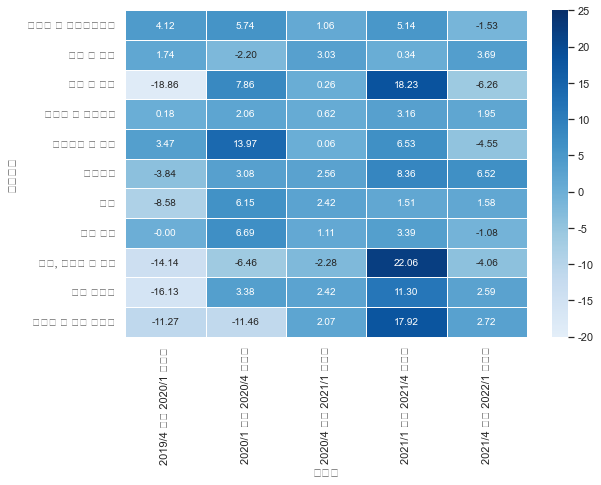

In [8]:
#시각화
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import seaborn as sns
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data, vmin= -20,  vmax= 25,cbar=True, center=0,
            annot=True, fmt=".2f", linewidths=.5, cmap='Blues')